In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)

In [2]:
import parse_data as parse
df = parse.df
df = df.dropna(how='any')

y    = df['PM_US_Post']
HOUR = df['Hour']
DEWP = df['Dew_Point_Temperature']
HUMI = df['Humidity']
PRES = df['Pressure']
TEMP = df['Temperature']
PREC = df['Precipitation'] 

df.describe()

,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
count,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000,25162.000000
mean,11.498728,93.893649,2.203164,53.524720,1016.313508,13.197838,0.050974
std,6.924555,94.175806,14.025203,25.809073,10.250734,11.820144,0.595409
min,0.000000,1.000000,-40.000000,2.000000,991.000000,-17.000000,0.000000
25%,5.000000,26.000000,-9.000000,31.000000,1008.000000,3.000000,0.000000
50%,11.000000,66.000000,3.000000,54.000000,1016.000000,14.000000,0.000000
75%,18.000000,126.000000,15.000000,76.000000,1025.000000,23.000000,0.000000
max,23.000000,886.000000,26.000000,100.000000,1046.000000,42.000000,30.400000


In [3]:
df_c = df[df['Dew_Point_Temperature']<= -8] #s=sunny
df_w = df[df['Dew_Point_Temperature']> -8]

PM_c = np.array(df_c['PM_US_Post'])
PM_w = np.array(df_w['PM_US_Post'])

HUMI_c = np.array(df_c['Humidity'])
HUMI_w = np.array(df_w['Humidity'])

DEWP_w = np.array(df_w['Dew_Point_Temperature'])
PRES_w = np.array(df_w['Pressure'])
TEMP_w = np.array(df_w['Temperature'])
PREC_w = np.array(df_w['Precipitation'])

t,p    = stats.ttest_ind(PM_c, PM_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, HUMI_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, PM_c)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_w, PM_w)

print(t)
print(p)

results  = stats.linregress(PM_c, HUMI_c)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, HUMI_w)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, DEWP_w+TEMP_w)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, TEMP_w-DEWP_w)
p        = results.pvalue
print(results)
print()
print(p)

np.corrcoef(PM_c, HUMI_c) #高め
np.corrcoef(PM_w, TEMP_w-DEWP_w)


-21.53872342387124
5.636619717990379e-102
-98.67046323668856
0.0
-38.64092987417401
0.0
-54.68738262302512
0.0
LinregressResult(slope=np.float64(0.12421626796082574), intercept=np.float64(22.97244355961385), rvalue=np.float64(0.5603443645198294), pvalue=np.float64(0.0), stderr=np.float64(0.002151467865911875), intercept_stderr=np.float64(0.2512303528440812))

0.0
LinregressResult(slope=np.float64(0.0728824160614286), intercept=np.float64(54.79422500710985), rvalue=np.float64(0.30425007150673006), pvalue=np.float64(0.0), stderr=np.float64(0.001706774189626945), intercept_stderr=np.float64(0.2373263200743237))

0.0
LinregressResult(slope=np.float64(-0.07366477611559698), intercept=np.float64(34.74886695678788), rvalue=np.float64(-0.3878087796083219), pvalue=np.float64(0.0), stderr=np.float64(0.001309566554583021), intercept_stderr=np.float64(0.18209474526886926))

0.0
LinregressResult(slope=np.float64(-0.023445255357872657), intercept=np.float64(10.874759558884397), rvalue=np.float64(-0.

array([[ 1.        , -0.32223816],
       [-0.32223816,  1.        ]])

In [4]:
#12時のみを抽出
df_12 = df[df['Hour']==12]

df_c = df_12[df_12['Dew_Point_Temperature']<= -8] #s=sunny
df_w = df_12[df_12['Dew_Point_Temperature']> -8]

PM_c = np.array(df_c['PM_US_Post'])
PM_w = np.array(df_w['PM_US_Post'])

HUMI_c = np.array(df_c['Humidity'])
HUMI_w = np.array(df_w['Humidity'])

DEWP_w = np.array(df_w['Dew_Point_Temperature'])
PRES_w = np.array(df_w['Pressure'])
TEMP_w = np.array(df_w['Temperature'])
PREC_w = np.array(df_w['Precipitation'])

t,p    = stats.ttest_ind(PM_c, PM_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, HUMI_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, PM_c)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_w, PM_w)

print(t)
print(p)

results  = stats.linregress(PM_c, HUMI_c)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, HUMI_w)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, DEWP_w+TEMP_w)
p        = results.pvalue
print(results)
print()
print(p)

np.corrcoef(PM_c, HUMI_c) #高め
np.corrcoef(PM_w, DEWP_w+TEMP_w-HUMI_w)

-7.084753967020899
2.556781364657082e-12
-22.417154573713738
3.4488618621983156e-91
-9.740793478999787
5.04194681657067e-21
-13.381660354380397
1.416748770678569e-38
LinregressResult(slope=np.float64(0.11431637133200329), intercept=np.float64(14.285484262196745), rvalue=np.float64(0.6352860297598123), pvalue=np.float64(2.3280876129133307e-38), stderr=np.float64(0.007708511200140627), intercept_stderr=np.float64(0.6573228385578319))

2.3280876129133307e-38
LinregressResult(slope=np.float64(0.09172610686238403), intercept=np.float64(39.84615477301807), rvalue=np.float64(0.40143945466543624), pvalue=np.float64(2.9445070679343146e-29), stderr=np.float64(0.0078100155441686685), intercept_stderr=np.float64(1.041746448863825))

2.9445070679343146e-29
LinregressResult(slope=np.float64(-0.07461538562279676), intercept=np.float64(38.18830458393163), rvalue=np.float64(-0.4013062753047674), pvalue=np.float64(3.083355863052506e-29), stderr=np.float64(0.006355637242253429), intercept_stderr=np.float

array([[ 1.       , -0.5717677],
       [-0.5717677,  1.       ]])

<function matplotlib.pyplot.show(close=None, block=None)>

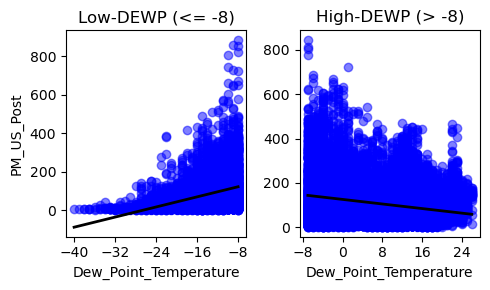

In [5]:
df_h = df[df['PM_US_Post']>126]




i_low  = DEWP <= -8  
i_high = DEWP > -8   

fig,axs = plt.subplots( 1, 2, figsize=(5,3), tight_layout=True )

for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( DEWP[i], y[i], alpha=0.5, color='b' )
for ax,i in zip(axs, [i_low, i_high]):
    plot_regression_line(ax, DEWP[i], y[i], color='k', ls='-', lw=2)

[ax.set_xlabel('Dew_Point_Temperature') for ax in axs] 
axs[0].set_ylabel('PM_US_Post') 

axs[0].set_title('Low-DEWP (<= -8)')
axs[1].set_title('High-DEWP (> -8)')

axs[0].set_xticks([-40, -32, -24, -16, -8])
axs[1].set_xticks([-8, 0, 8, 16, 24])
plt.show


In [6]:
np.corrcoef(y,HUMI)
results  = stats.linregress(y, TEMP)
p        = results.pvalue
print(results)
print()
print(p)

LinregressResult(slope=np.float64(-0.030512011968384833), intercept=np.float64(16.062722156423757), rvalue=np.float64(-0.24310138012395777), pvalue=np.float64(0.0), stderr=np.float64(0.0007675386152051361), intercept_stderr=np.float64(0.10207036426845352))

0.0


In [7]:
#DEWPを―8℃でわける


df_c = df[df['Dew_Point_Temperature'] <= -8] #c=cold
df_w = df[df['Dew_Point_Temperature'] > -8]

PM_c = np.array(df_c['PM_US_Post'])
PM_w = np.array(df_w['PM_US_Post'])

HUMI_c = np.array(df_c['Humidity'])
HUMI_w = np.array(df_w['Humidity'])

DEWP_w = np.array(df_w['Dew_Point_Temperature'])
PRES_w = np.array(df_w['Pressure'])
TEMP_w = np.array(df_w['Temperature'])
PREC_w = np.array(df_w['Precipitation'])


t,p    = stats.ttest_ind(PM_c, PM_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, HUMI_w)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_c, PM_c)

print(t)
print(p)

t,p    = stats.ttest_ind(HUMI_w, PM_w)

print(t)
print(p)

results  = stats.linregress(PM_c, HUMI_c)
p        = results.pvalue
print(results)
print()
print(p)

results  = stats.linregress(PM_w, HUMI_w)
p        = results.pvalue
print(results)
print()
print(p)

np.corrcoef(PM_c, HUMI_c) #高め

# allmost every hypothesis test (both ttest and regression) between PM and HUMI divided into several groups has p that is 0 or very close 0.
# One of the major reasons seems that the number of data is quite large, which makes p very small.
# When I showed correlation coefficient between PM_c and HUMI_c, I found the coefficient was quite large.
#Thus I will show the scatter plot dividing the data into three groups: High, Middle and Low DEWP.

-21.53872342387124
5.636619717990379e-102
-98.67046323668856
0.0
-38.64092987417401
0.0
-54.68738262302512
0.0
LinregressResult(slope=np.float64(0.12421626796082574), intercept=np.float64(22.97244355961385), rvalue=np.float64(0.5603443645198294), pvalue=np.float64(0.0), stderr=np.float64(0.002151467865911875), intercept_stderr=np.float64(0.2512303528440812))

0.0
LinregressResult(slope=np.float64(0.0728824160614286), intercept=np.float64(54.79422500710985), rvalue=np.float64(0.30425007150673006), pvalue=np.float64(0.0), stderr=np.float64(0.001706774189626945), intercept_stderr=np.float64(0.2373263200743237))

0.0


array([[1.        , 0.56034436],
       [0.56034436, 1.        ]])

In [8]:



df_c = df[(df['Dew_Point_Temperature'] > -40) & (df['Dew_Point_Temperature'] <= -5)]
df_m = df[(df['Dew_Point_Temperature'] > -5) & (df['Dew_Point_Temperature'] <= -2)]
df_w = df[(df['Dew_Point_Temperature'] > -2) & (df['Dew_Point_Temperature'] <= 26)]


PM_c = np.array(df_c['PM_US_Post'])
PM_m = np.array(df_m['PM_US_Post'])
PM_w = np.array(df_w['PM_US_Post'])

HUMI_c = np.array(df_c['Humidity'])
HUMI_m = np.array(df_m['Humidity'])
HUMI_w = np.array(df_w['Humidity'])


print(np.corrcoef(PM_c, HUMI_c))#高め)
print(np.corrcoef(PM_m, HUMI_m))
print(np.corrcoef(PM_w, HUMI_w))


[[1.         0.62400183]
 [0.62400183 1.        ]]
[[1.         0.52726788]
 [0.52726788 1.        ]]
[[1.         0.27305749]
 [0.27305749 1.        ]]


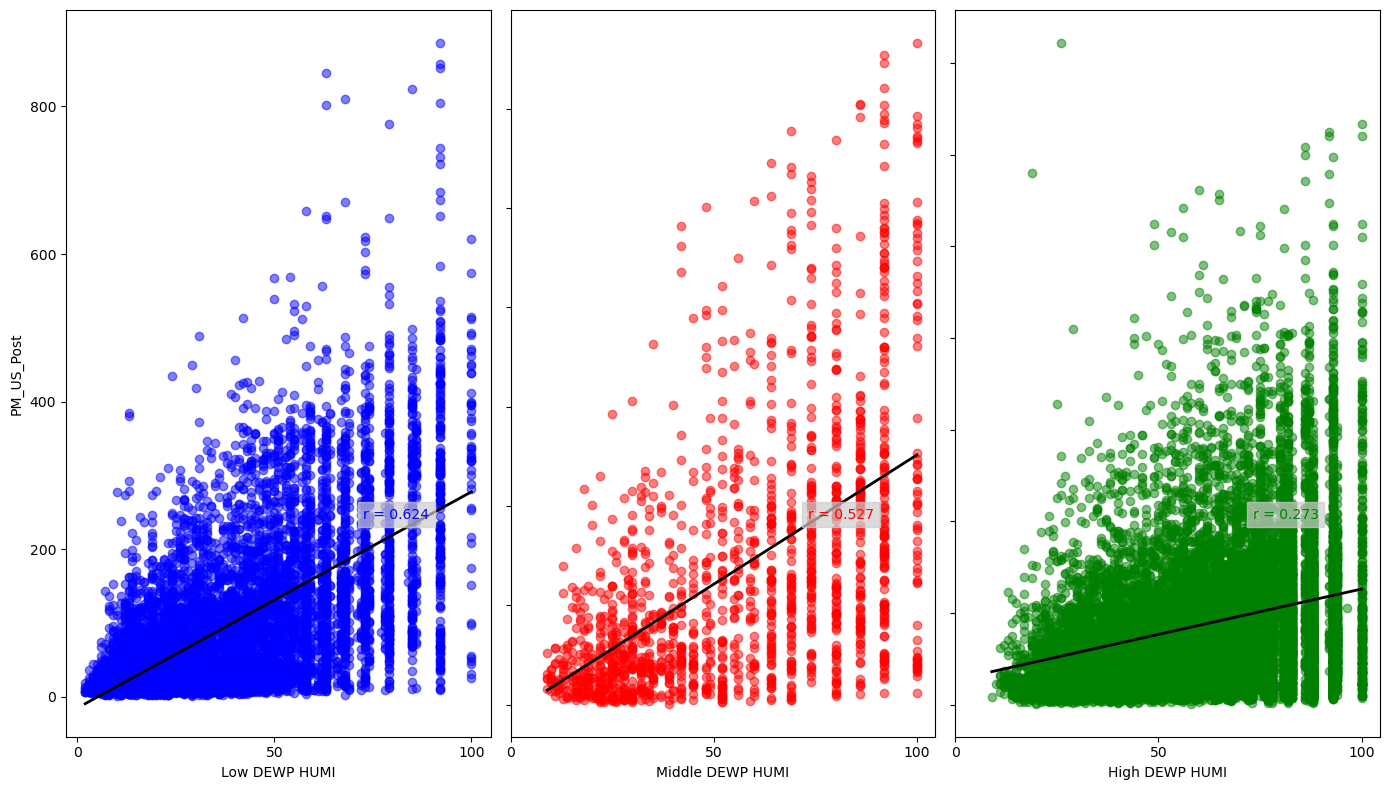

Allmost every hypothesis test (both ttest and regression) between PM and HUMI divided into several groups has p that is 0 or very close 0
Here is the result of regression hypothesis test between PM and HUMI of a certain group
LinregressResult(slope=np.float64(0.11110940482433018), intercept=np.float64(38.12368658365011), rvalue=np.float64(0.564999034230736), pvalue=np.float64(0.0), stderr=np.float64(0.0019623319427272703), intercept_stderr=np.float64(0.35669996775727475))

0.0
One of the major reasons seems that the number of data is quite large, which makes p very small.
But the p value is less than 0.05, so it can be said correlation coefficient between PM_c and HUMI_c will not be 0
When I showed correlation coefficient between PM_c and HUMI_c, I found the coefficient was quite large.
Thus I will show the scatter plot dividing the data into three groups: High, Middle and Low DEWP.
As a result it seemes that there is more correlation between PM and HUMI when DEWP is low
[[1.         0

In [15]:


def regression_DEWP():
    df_c = df[(df['Dew_Point_Temperature'] > -40) & (df['Dew_Point_Temperature'] <= -5)]
    df_m = df[(df['Dew_Point_Temperature'] > -5) & (df['Dew_Point_Temperature'] <= -2)]
    df_w = df[(df['Dew_Point_Temperature'] > -2) & (df['Dew_Point_Temperature'] <= 26)]


    PM_c = np.array(df_c['PM_US_Post'])
    PM_m = np.array(df_m['PM_US_Post'])
    PM_w = np.array(df_w['PM_US_Post'])

    HUMI_c = np.array(df_c['Humidity'])
    HUMI_m = np.array(df_m['Humidity'])
    HUMI_w = np.array(df_w['Humidity'])
    fig,axs = plt.subplots( 1,3 , figsize=(14,8), tight_layout=True )
    dvs     = [PM_c, PM_m, PM_w]
    ivs     = [HUMI_c, HUMI_m, HUMI_w]
    colors  = 'b', 'r', 'g'
    for ax,y,x,c in zip(axs, dvs, ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
    xlabels = 'Low DEWP HUMI', 'Middle DEWP HUMI', 'High DEWP HUMI'
    [ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
    axs[0].set_xticks([0, 50, 100])
    axs[1].set_xticks([0, 50, 100])
    axs[2].set_xticks([0, 50, 100])
    axs[0].set_ylabel('PM_US_Post')
    [ax.set_yticklabels([])  for ax in axs[1:]]
    plt.show()

regression_DEWP()

def comment0_DEWP():
    print('Allmost every hypothesis test (both ttest and regression) between PM and HUMI divided into several groups has p that is 0 or very close 0')
    print('Here is the result of regression hypothesis test between PM and HUMI of a certain group:')
    results  = stats.linregress(PM_c, HUMI_c)
    p        = results.pvalue
    print(results)
    print()
    print(p)
    print('One of the major reasons seems that the number of data is quite large, which makes p very small.')
    print('But the p value is less than 0.05, so it can be said correlation coefficient between PM_c and HUMI_c will not be 0')
    print('When I showed correlation coefficient between PM_c and HUMI_c, I found the coefficient was quite large.')
    print('Thus I will show the scatter plot dividing the data into three groups: High, Middle and Low DEWP.')
comment_DEWP()

def comment1_DEWP():
    print('As a result it seemes that there is more correlation between PM and HUMI when DEWP is low')
comment1_DEWP()

print(np.corrcoef(PM_c, HUMI_c))

In [20]:



df_c = df[(df['Temperature'] >= -17) & (df['Temperature'] <= 3)]
df_m1 = df[(df['Temperature'] > 3) & (df['Temperature'] <= 14)]
df_m2 = df[(df['Temperature'] > 14) & (df['Temperature'] <= 23)]
df_w = df[(df['Temperature'] > 23) & (df['Temperature'] <= 42)]


PM_c = np.array(df_c['PM_US_Post'])
PM_m1 = np.array(df_m1['PM_US_Post'])
PM_m2 = np.array(df_m2['PM_US_Post'])
PM_w = np.array(df_w['PM_US_Post'])

HUMI_c = np.array(df_c['Humidity'])
HUMI_w = np.array(df_w['Humidity'])

TEMP_c = np.array(df_c['Temperature'])
TEMP_m1 = np.array(df_m1['Temperature'])
TEMP_m2 = np.array(df_m2['Temperature'])
TEMP_w = np.array(df_w['Temperature'])



results  = stats.linregress(PM_c, TEMP_c)
p        = results.pvalue
print(results)
print()
print(p)

print(np.corrcoef(PM_c,TEMP_c)) #高め
print(np.corrcoef(PM_m1,TEMP_m1))
print(np.corrcoef(PM_m2,TEMP_m2))
print(np.corrcoef(PM_w,TEMP_w))

#On the other hand, I found a large p in this way.
#This is interesting because the data as a whole shows relatively high correlation coefficient between PM and TEMP.
#I will also show scatter plot and their correlation coefficients dividing into four groups based on quartiles

LinregressResult(slope=np.float64(-0.0004842271739275487), intercept=np.float64(-2.080461649965231), rvalue=np.float64(-0.016807547478133258), pvalue=np.float64(0.1645899832341387), stderr=np.float64(0.0003483779582333863), intercept_stderr=np.float64(0.06332588476162056))

0.1645899832341387
[[ 1.         -0.01680755]
 [-0.01680755  1.        ]]
[[ 1.         -0.02697947]
 [-0.02697947  1.        ]]
[[ 1.         -0.06922464]
 [-0.06922464  1.        ]]
[[ 1.         -0.23972276]
 [-0.23972276  1.        ]]


On the other hand, I found a large p trying regression hypothesis test between PM and TEMP when the temperature is low
the p value is 0.1645899832341387
Thus the hypothesis that the correlation coefficient is 0 was not rejected.
This is interesting because the data as a whole shows relatively high correlation coefficient between PM and TEMP.
I will also show scatter plot and their correlation coefficients dividing into four groups based on quartiles


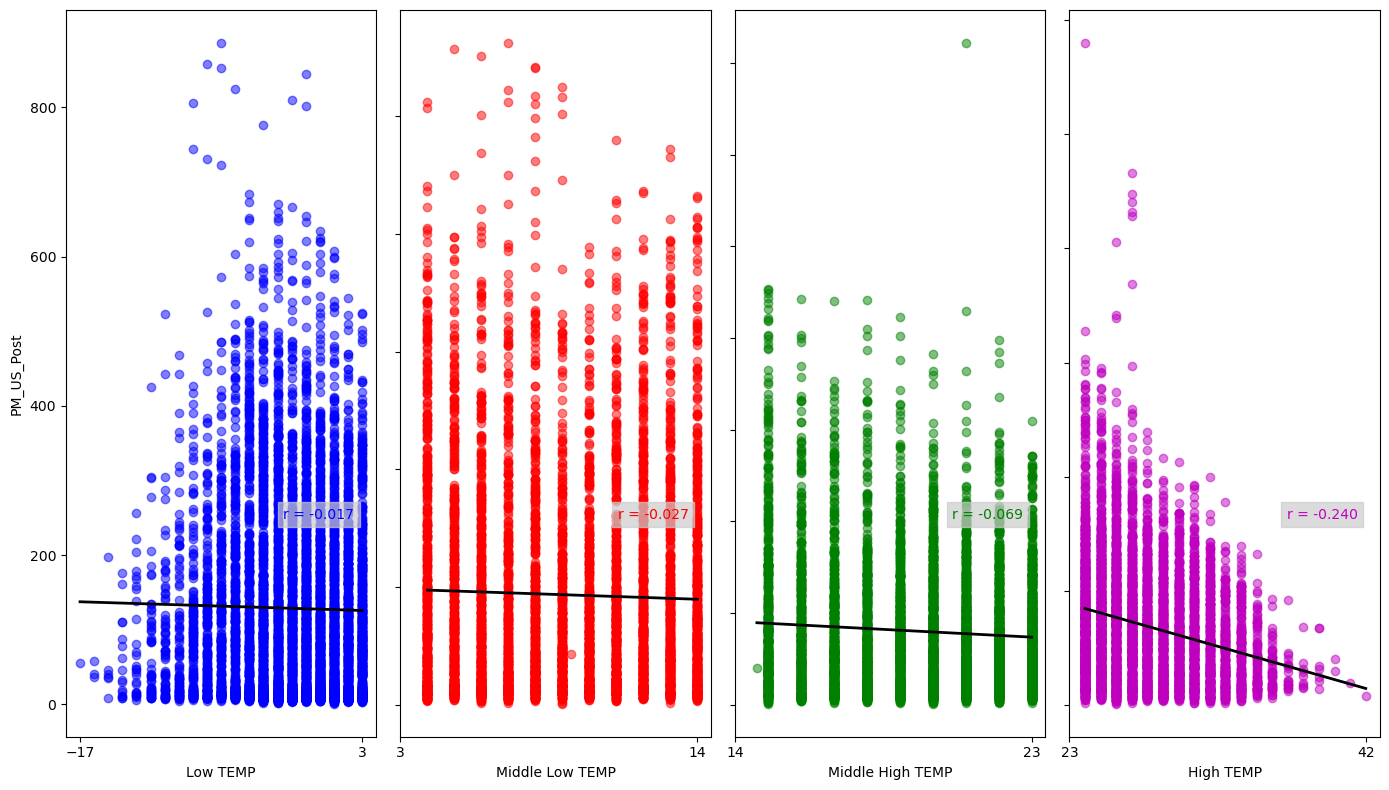

It was proved that there are almost no correalation between PM and TEMP when the data are divided except high temperaturegroup
though the correlation coefficient between PM and TEMP is relatively high
The results　also followed the statement above "Thus the hypothesis that the correlation coefficient is 0 was not rejected."


In [22]:
def comment0_TEMP():
    print('On the other hand, I found a large p trying regression hypothesis test between PM and TEMP when the temperature is low')
    print('the p value is', p)
    print('Thus the hypothesis that the correlation coefficient is 0 was not rejected.')
    print('This is interesting because the data as a whole shows relatively high correlation coefficient between PM and TEMP.')
    print('I will also show scatter plot and their correlation coefficients dividing into four groups based on quartiles')
comment0_TEMP()  

def regression_TEMP():
    df_c = df[(df['Temperature'] >= -17) & (df['Temperature'] <= 3)]
    df_m1 = df[(df['Temperature'] > 3) & (df['Temperature'] <= 14)]
    df_m2 = df[(df['Temperature'] > 14) & (df['Temperature'] <= 23)]
    df_w = df[(df['Temperature'] > 23) & (df['Temperature'] <= 42)]


    PM_c = np.array(df_c['PM_US_Post'])
    PM_m1 = np.array(df_m1['PM_US_Post'])
    PM_m2 = np.array(df_m2['PM_US_Post'])
    PM_w = np.array(df_w['PM_US_Post'])


    TEMP_c = np.array(df_c['Temperature'])
    TEMP_m1 = np.array(df_m1['Temperature'])
    TEMP_m2 = np.array(df_m2['Temperature'])
    TEMP_w = np.array(df_w['Temperature'])
    fig,axs = plt.subplots( 1,4 , figsize=(14,8), tight_layout=True )
    dvs     = [PM_c, PM_m1, PM_m2, PM_w]
    ivs     = [TEMP_c, TEMP_m1, TEMP_m2, TEMP_w]
    colors  = 'b', 'r', 'g' ,'m'
    for ax,y,x,c in zip(axs, dvs, ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
    xlabels = 'Low TEMP', 'Middle Low TEMP', 'Middle High TEMP', 'High TEMP'
    [ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
    axs[0].set_xticks([-17,3])
    axs[1].set_xticks([3,14])
    axs[2].set_xticks([14,23])
    axs[3].set_xticks([23,42])
    axs[0].set_ylabel('PM_US_Post')
    [ax.set_yticklabels([])  for ax in axs[1:]]
    plt.show()
regression_TEMP()

def comment1_TEMP():
    print('It was proved that there are almost no correalation between PM and TEMP when the data are divided except high temperaturegroup')
    print('though the correlation coefficient between PM and TEMP is relatively high')
    print('The results　also followed the statement above "Thus the hypothesis that the correlation coefficient is 0 was not rejected."') 
comment1_TEMP()